Marketing channels across age groups

Some marketing stakeholders want to know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.

Within a marketing team, it is common to get requests that require quick analysis and visualization. The better you are at visualizing the results, the more likely that you will effectively communicate your findings to your stakeholders.

In this exercise, you will create a grouped bar chart showing how many people each marketing channel reached by age group.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
marketing = pd.read_csv('marketing.csv')
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True


In [3]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

channel_age

marketing_channel  age_group  
Email              0-18 years      93
                   19-24 years    111
                   24-30 years    120
                   30-36 years     60
                   36-45 years     63
                   45-55 years     65
                   55+ years       53
Facebook           0-18 years     264
                   19-24 years    347
                   24-30 years    296
                   30-36 years    249
                   36-45 years    226
                   45-55 years    299
                   55+ years      179
House Ads          0-18 years     694
                   19-24 years    761
                   24-30 years    681
                   30-36 years    699
                   36-45 years    589
                   45-55 years    678
                   55+ years      631
Instagram          0-18 years     300
                   19-24 years    315
                   24-30 years    286
                   30-36 years    259
                   

In [4]:
# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 0))

channel_age_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18 years,93,264,694,300,186
19-24 years,111,347,761,315,145
24-30 years,120,296,681,286,183
30-36 years,60,249,699,259,86
36-45 years,63,226,589,280,193
45-55 years,65,299,678,227,82
55+ years,53,179,631,204,118


In [5]:
# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

channel_age_df

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


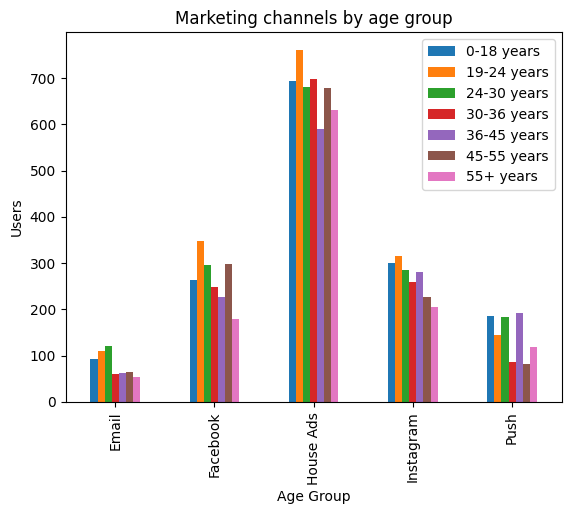

In [6]:
# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

Grouping and counting by multiple columns

Stakeholders have begun competing to see whose channel had the best retention rate from the campaign. You must first determine how many subscribers came from the campaign and how many of those subscribers have stayed on the service.

It's important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

You will build on what we have learned about .groupby() in previous exercises, this time grouping by multiple columns.

In [7]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()
retention_total

date_subscribed  subscribing_channel
1/1/18           Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
                                        ..
1/9/18           Email                   2
                 Facebook                7
                 House Ads              20
                 Instagram               9
                 Push                    2
Name: user_id, Length: 155, dtype: int64

In [8]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed', 
                                       'subscribing_channel'])['user_id'].nunique()
retention_subs

date_subscribed  subscribing_channel
1/1/18           Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
                                        ..
1/9/18           Email                   1
                 Facebook                2
                 House Ads              17
                 Instagram               6
                 Push                    1
Name: user_id, Length: 146, dtype: int64

Analyzing retention rates for the campaign

Now that you've calculated the total subscribers and retained subscribers, you can settle the question of which channel had the highest retention rate.

In this exercise, you will calculate the retention rate for each subscription channel and visualize your results.

In [9]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

retention_rate_df

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
1/1/18,1.000000,0.875000,0.687500,0.750000,1.000000
1/10/18,1.000000,0.714286,0.666667,0.555556,1.000000
1/11/18,0.333333,0.571429,0.166667,1.000000,1.000000
1/12/18,NaN,0.571429,NaN,0.500000,0.333333
1/13/18,0.333333,0.666667,0.166667,0.666667,0.500000
1/14/18,1.000000,0.666667,0.166667,0.909091,NaN
1/15/18,0.804348,0.375000,0.166667,0.875000,1.000000
1/16/18,0.943396,0.588235,0.166667,0.294118,0.636364
1/17/18,0.432432,0.642857,0.333333,0.894737,0.900000


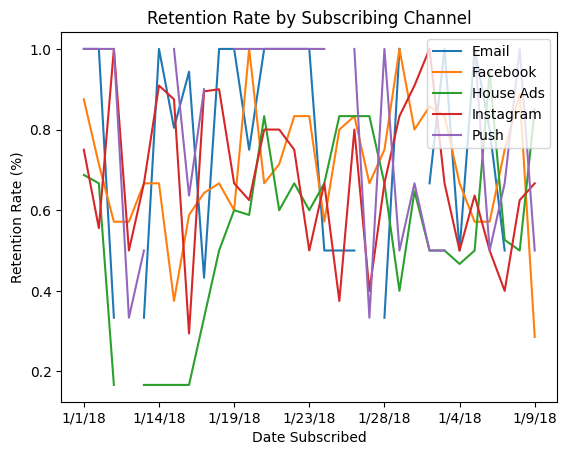

In [10]:
# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right',labels = retention_rate_df.columns.values)
plt.show()

Building a conversion function

You've been doing a lot of repetitive calculations. Anytime you notice repetition in your work, consider automation. The more of the low-variance work you can automate, the more time you will have to explore new and interesting data science topics at work. This will both impress your marketing stakeholders and be more fun!

Since you know the format of the marketing DataFrame will remain the same over time, you can build a function to enable you to calculate conversion rate across any sub-segment you want on the fly.

In this exercise, you will build a function that takes a DataFrame and list of column names and outputs the conversion rate across the column(s).

In [11]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total =  dataframe.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    
    return conversion_rate

Test and visualize conversion function

You've done the hard work of building your conversion rate function—now it's time to test it out! Automating your analyses can be time-consuming up front, but this is where it all pays off.

In this exercise, you'll see how quickly you can calculate the conversion rate. A task that in previous lessons took multiple steps. By automating the repetitive parts of your work, you'll be able to spend more time doing complex analyses.

In [12]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level='age_group'))

age_group_df

date_served  age_group  
1/1/18       0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
1/9/18       24-30 years    0.152174
             30-36 years    0.090909
             36-45 years    0.093023
             45-55 years    0.068182
             55+ years      0.102564
Name: user_id, Length: 217, dtype: float64


age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
1/1/18,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
1/10/18,0.100000,0.216667,0.129630,0.068182,0.088889,0.090909,0.100000
1/11/18,0.085106,0.187500,0.173913,0.000000,0.000000,0.055556,0.029412
1/12/18,0.071429,0.226415,0.076923,0.075000,0.000000,0.000000,0.045455
1/13/18,0.105263,0.130435,0.113636,0.052632,0.100000,0.023256,0.052632
1/14/18,0.136364,0.200000,0.071429,0.025000,0.025641,0.073171,0.000000
1/15/18,0.131148,0.170543,0.158940,0.090909,0.061224,0.074468,0.035294
1/16/18,0.338462,0.371429,0.408451,0.109091,0.095238,0.130435,0.153846
1/17/18,0.244898,0.315789,0.220339,0.224490,0.196721,0.156863,0.162791


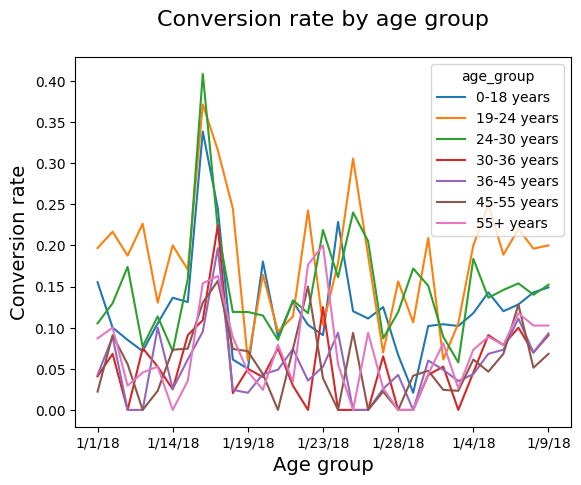

In [13]:
# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

Plotting function

Now that you've looked at conversion rate by age, you want to see if that trend has changed over time. Marketing has been changing their strategy and wants to make sure that their new method isn't alienating age groups that are less comfortable with their product. However, to do so, you need to create a plotting function to make it easier to visualize your results.

In this exercise, you will build a function to plot the results of your conversion rate function.

In [14]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Set figure size
        plt.figure(figsize=(12, 6))
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' Conversion Rate\n', size=16)
        plt.ylabel('Conversion Rate', size=14)
        plt.xlabel('Date', size=14)
        # Rotate dates on x-axis
        plt.xticks(rotation=45)
        # Show plot
        plt.show()  
        plt.clf()


Putting it all together

Your marketing stakeholders have requested a report of the daily conversion rate for each age group, and they need it as soon as possible. They want you to refresh this report on a monthly cadence. This is a perfect opportunity to utilize your functions. Not only will the functions help you get this report out promptly today, but it will also help each month when it's time for a refresh of the data.

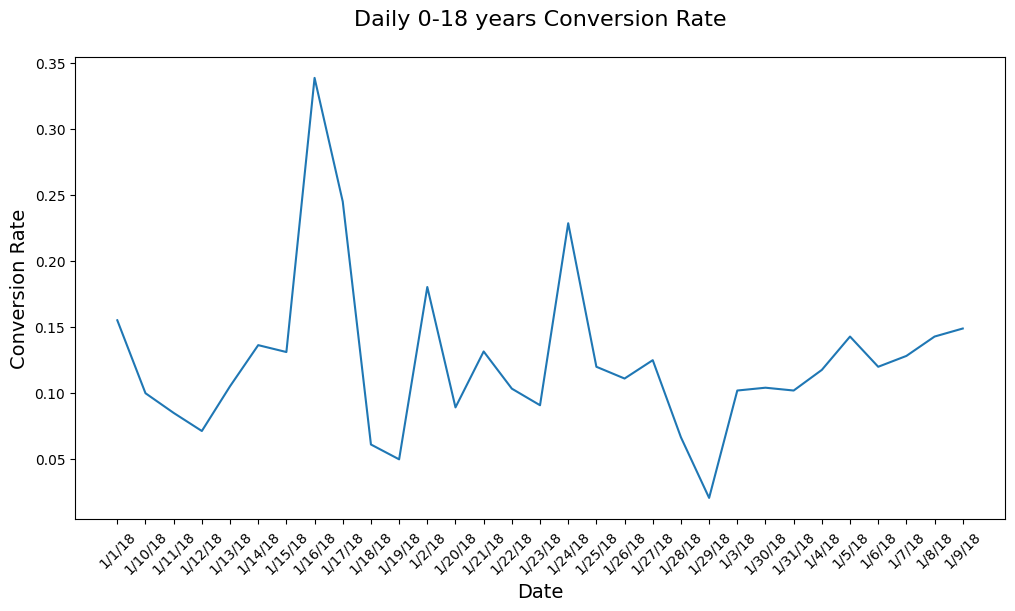

<Figure size 640x480 with 0 Axes>

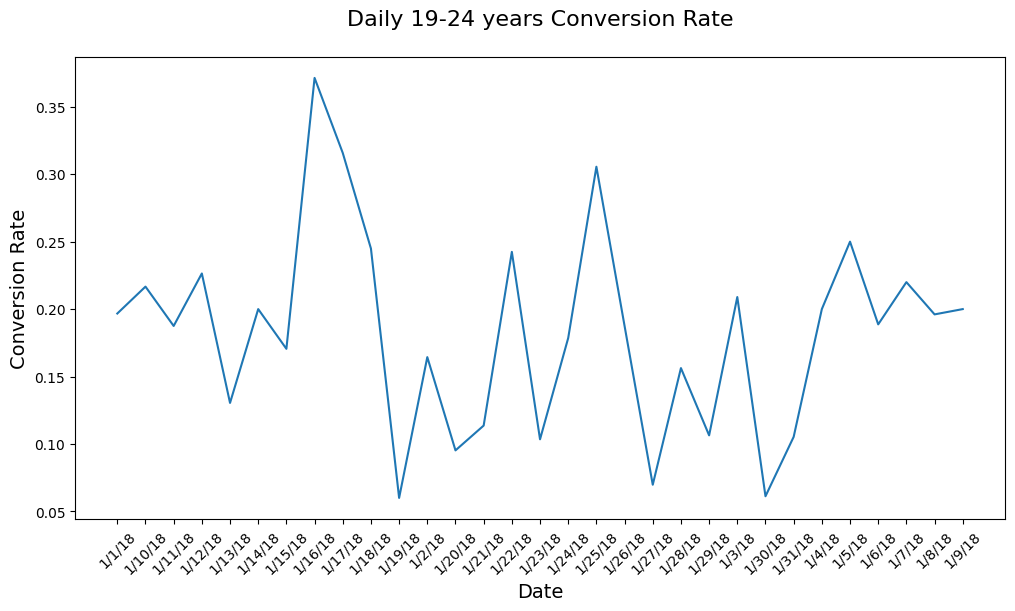

<Figure size 640x480 with 0 Axes>

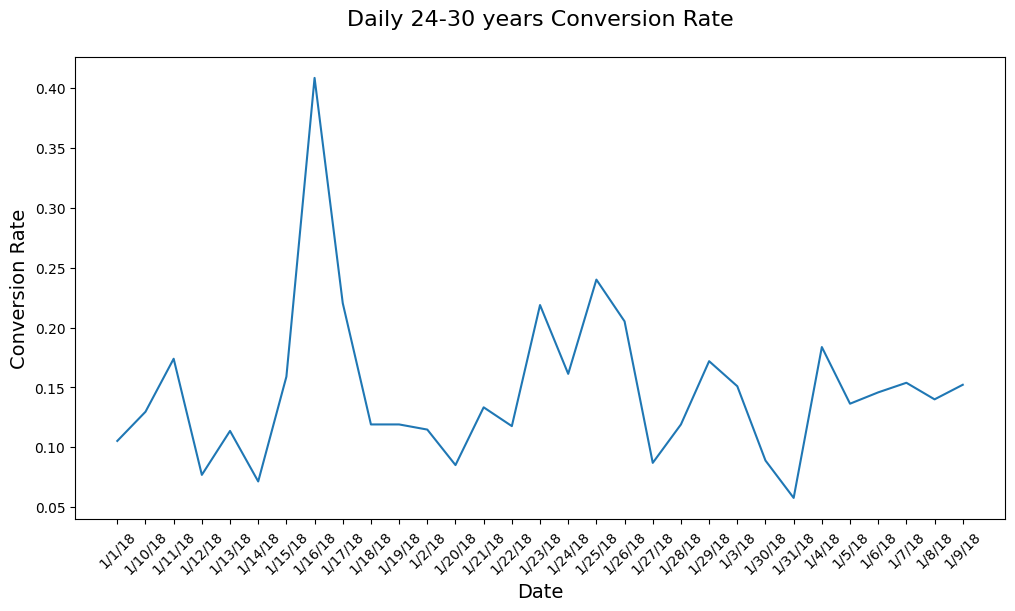

<Figure size 640x480 with 0 Axes>

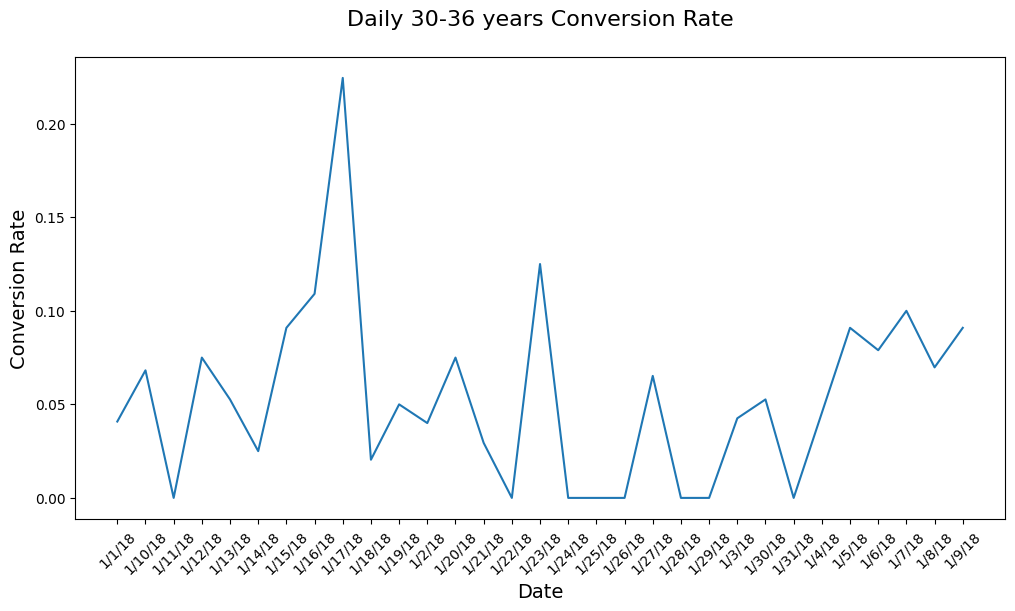

<Figure size 640x480 with 0 Axes>

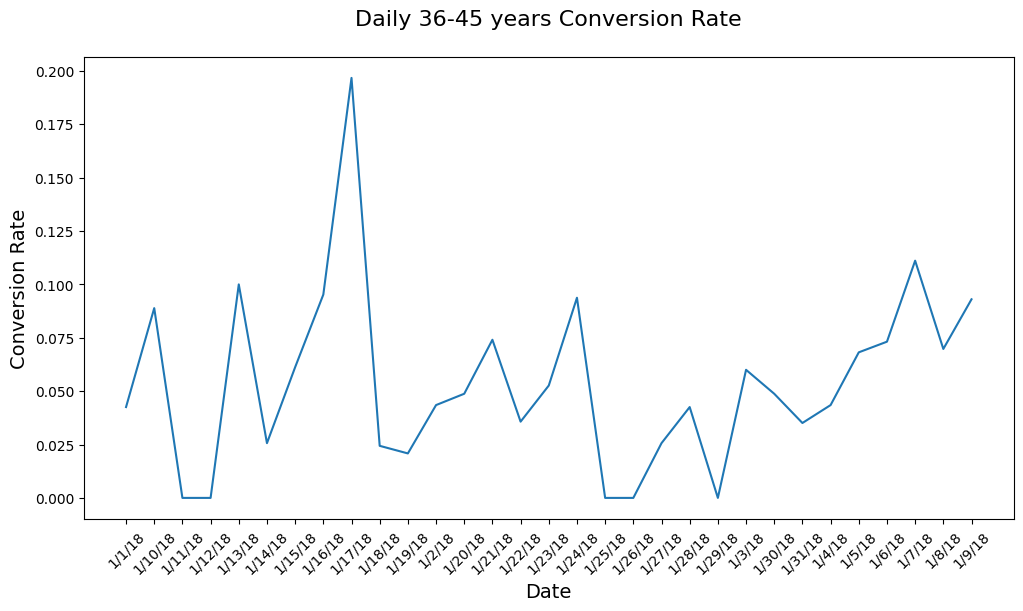

<Figure size 640x480 with 0 Axes>

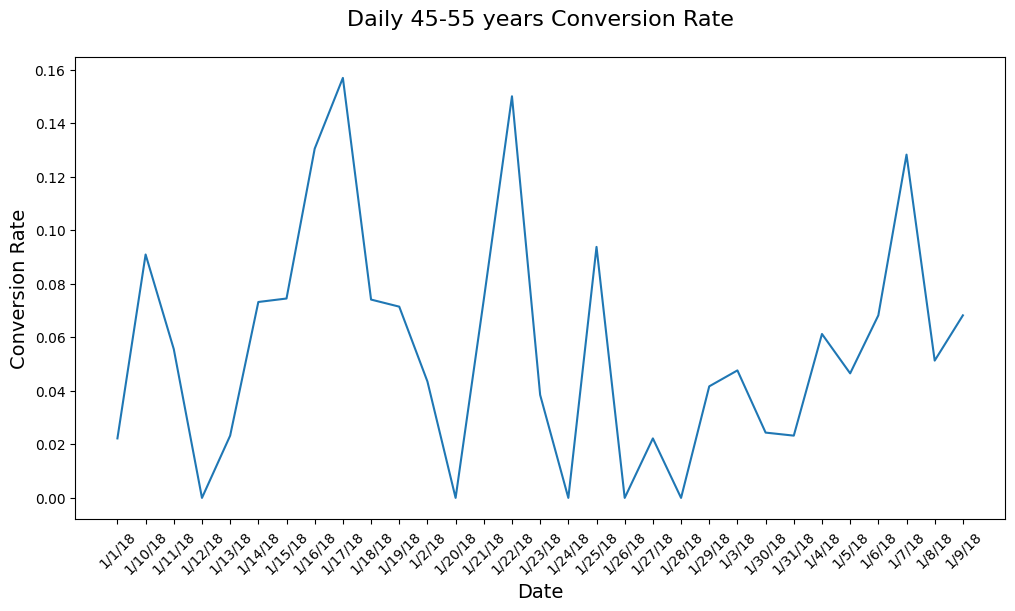

<Figure size 640x480 with 0 Axes>

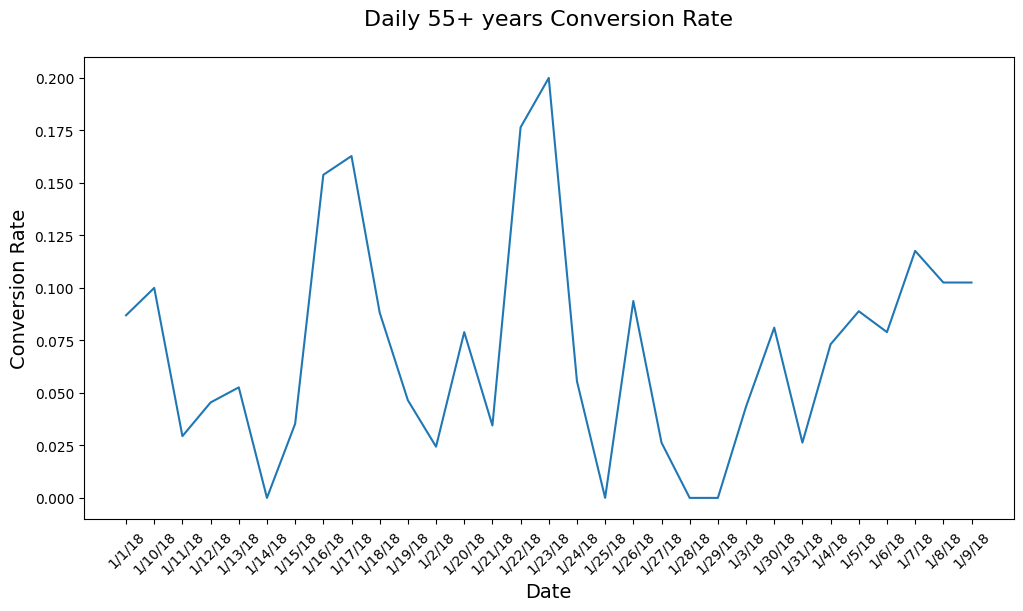

<Figure size 640x480 with 0 Axes>

In [15]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing,['date_served','age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

House ads conversion rate

The house ads team has become worried about some irregularities they've noticed in conversion rate. It is common for stakeholders to come to you with concerns they've noticed around changing metrics. As a data scientist, it's your job to determine whether these changes are natural fluctuations or if they require further investigation.

In this exercise, you'll try out your conversion_rate() and plotting_conv() functions out on marketing looking at conversion rate by 'date_served' and 'marketing_channel'.

In [16]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])
daily_conv_channel

date_served  marketing_channel
1/1/18       Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
                                    ...   
1/9/18       Email                0.500000
             Facebook             0.120690
             House Ads            0.127389
             Instagram            0.152542
             Push                 0.054054
Name: user_id, Length: 155, dtype: float64

In [17]:
# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 'marketing_channel'))

daily_conv_channel


marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
1/1/18,1.000000,0.117647,0.084656,0.106667,0.083333
1/10/18,0.500000,0.109375,0.124260,0.134328,0.028571
1/11/18,0.666667,0.120690,0.038710,0.116667,0.085714
1/12/18,0.500000,0.114754,0.027211,0.142857,0.083333
1/13/18,1.000000,0.142857,0.040541,0.096774,0.066667
1/14/18,1.000000,0.105263,0.039735,0.171875,0.058824
1/15/18,0.154791,0.119403,0.029268,0.125000,0.055556
1/16/18,0.905660,0.250000,0.038710,0.239437,0.261905
1/17/18,0.914286,0.202899,0.040816,0.246753,0.232558


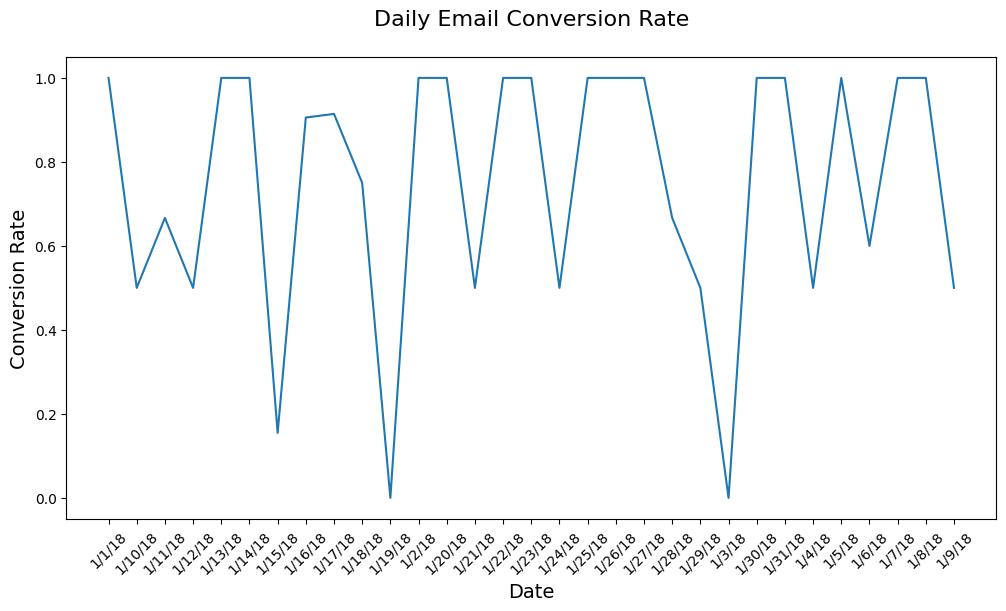

<Figure size 640x480 with 0 Axes>

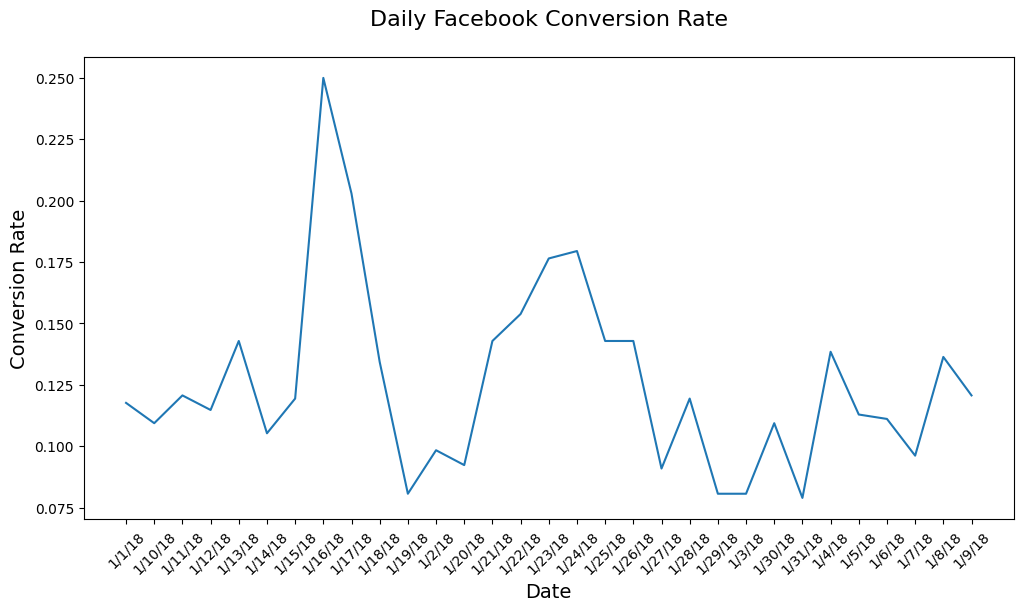

<Figure size 640x480 with 0 Axes>

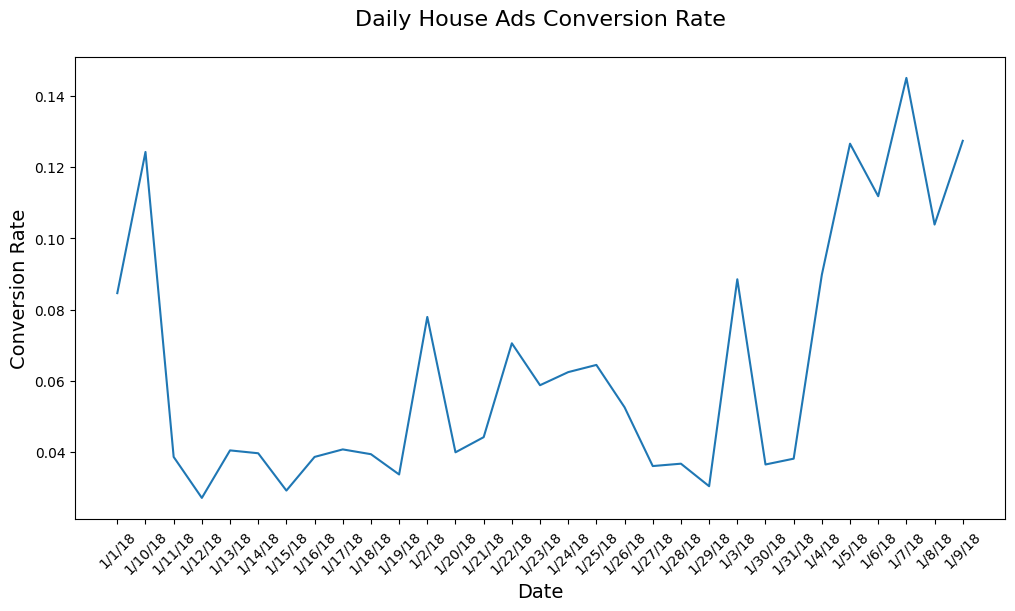

<Figure size 640x480 with 0 Axes>

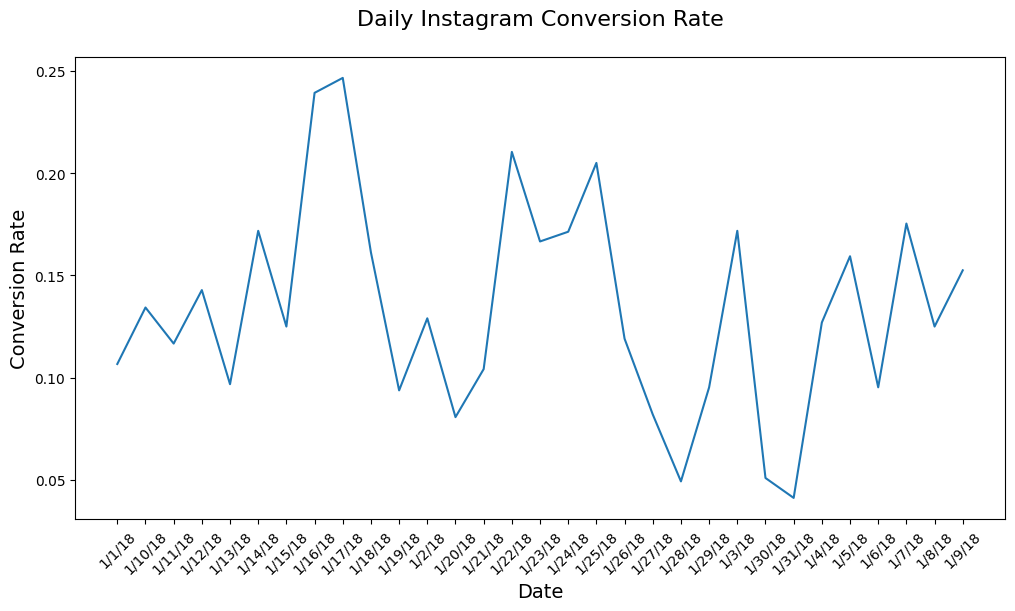

<Figure size 640x480 with 0 Axes>

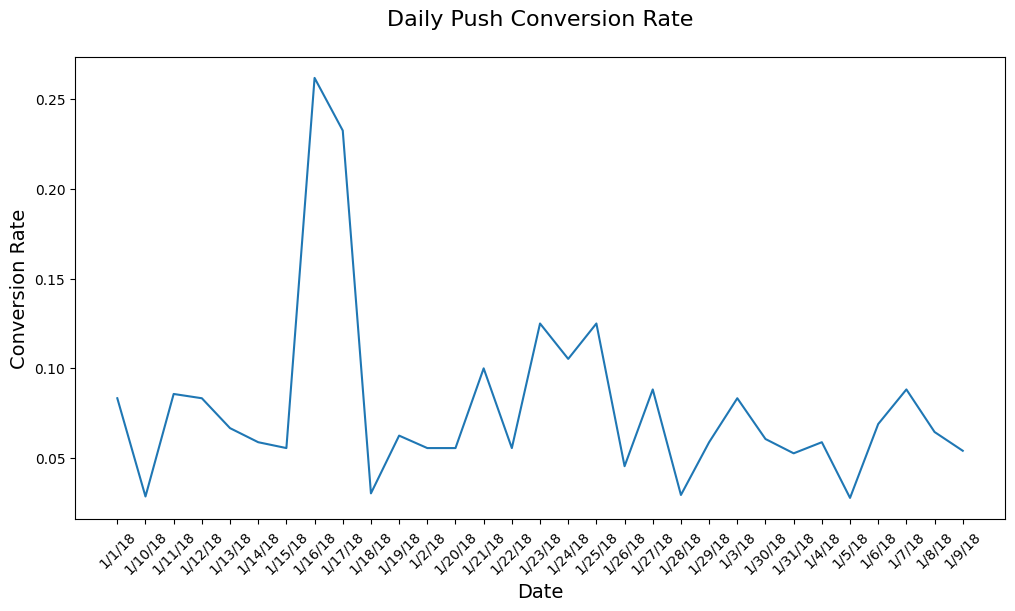

<Figure size 640x480 with 0 Axes>

In [18]:
# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

Analyzing House ads conversion rate

Now that you have confirmed that house ads conversion has been down since January 11, you will try to identify potential causes for the decrease.

As a data scientist supporting a marketing team, you will run into fluctuating metrics all the time. It's vital to identify if the fluctuations are due to expected shifts in user behavior (i.e., differences across the day of the week) versus a larger problem in technical implementation or marketing strategy.

In this exercise, we will begin by checking whether users are more likely to convert on weekends compared with weekdays and determine if that could be the cause for the changing house ads conversion rate.

In [19]:
marketing['date_served'] = pd.to_datetime(marketing['date_served'])

# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

marketing

C:\Users\Alienware\AppData\Local\Temp\ipykernel_29188\3072591761.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing['date_served'] = pd.to_datetime(marketing['date_served'])


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True,2.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True,4.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True,2.0


In [20]:
# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

DoW_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DoW_served,,,,,
0.0,0.162621,0.119601,0.062660,0.122517,0.064516
1.0,0.906250,0.147887,0.070312,0.151943,0.115854
2.0,0.837209,0.127036,0.075269,0.150160,0.105882
3.0,0.727273,0.133333,0.059034,0.143498,0.067797
4.0,0.666667,0.110132,0.062278,0.129870,0.055556
5.0,0.818182,0.109375,0.057566,0.088710,0.069767
6.0,0.750000,0.116071,0.065217,0.127193,0.065574


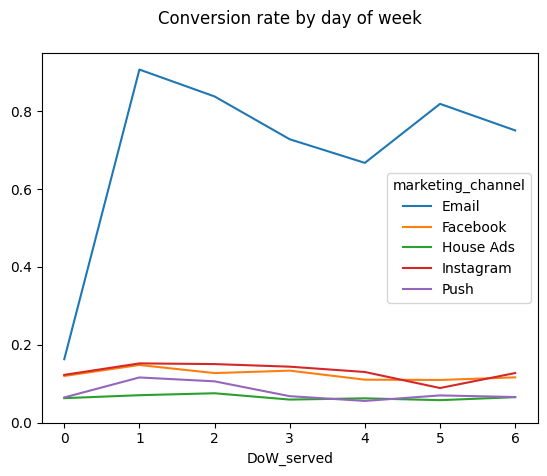

In [21]:
# Plot conversion rate by day of week
DoW_df.plot(kind='line')
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

House ads conversion by language

Now that you've ruled out natural fluctuations across the day of the week a user saw our marketing assets as they cause for decreasing house ads conversion, you will take a look at conversion by language over time. Perhaps the new marketing campaign does not apply broadly across different cultures.

Ideally, the marketing team will consider cultural differences prior to launching a campaign, but sometimes mistakes are made, and it will be your job to identify the cause. Often data scientists are the first line of defense to determine what went wrong with a marketing campaign. It's your job to think creatively to identify the cause.

In [22]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads,['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

conv_lang_df

language_displayed,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,1.0,0.075145,0.200000,0.000000
2018-01-02,0.0,0.068966,0.600000,0.000000
2018-01-03,0.0,0.083799,0.333333,0.125000
2018-01-04,0.0,0.080537,0.000000,0.214286
2018-01-05,NaN,0.118881,0.000000,0.214286
2018-01-06,1.0,0.087591,0.000000,0.200000
2018-01-07,1.0,0.117647,1.000000,0.125000
2018-01-08,NaN,0.079710,0.500000,0.200000
2018-01-09,NaN,0.129252,NaN,0.100000


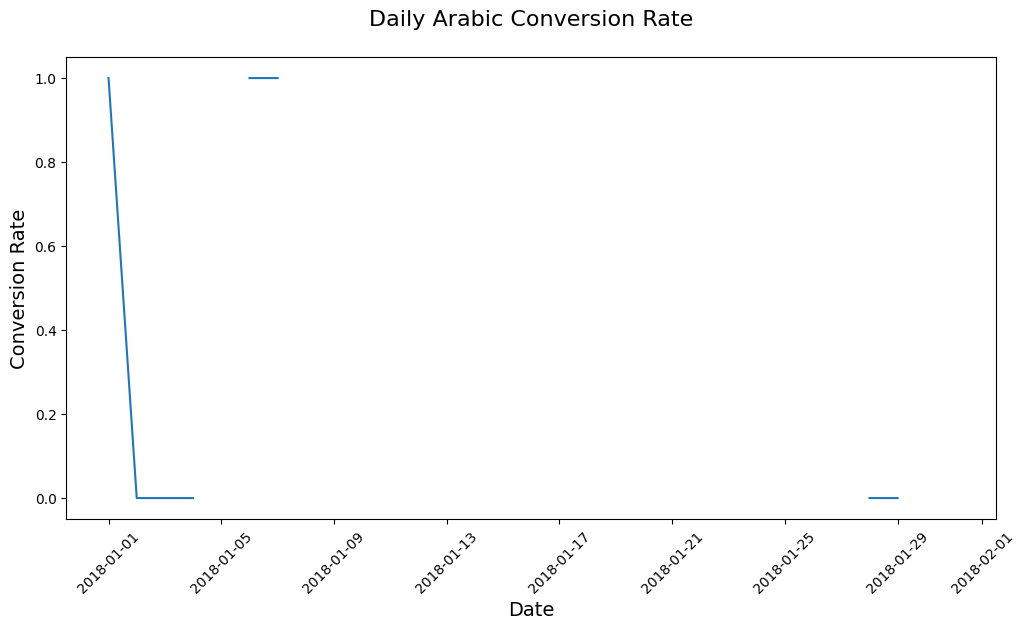

<Figure size 640x480 with 0 Axes>

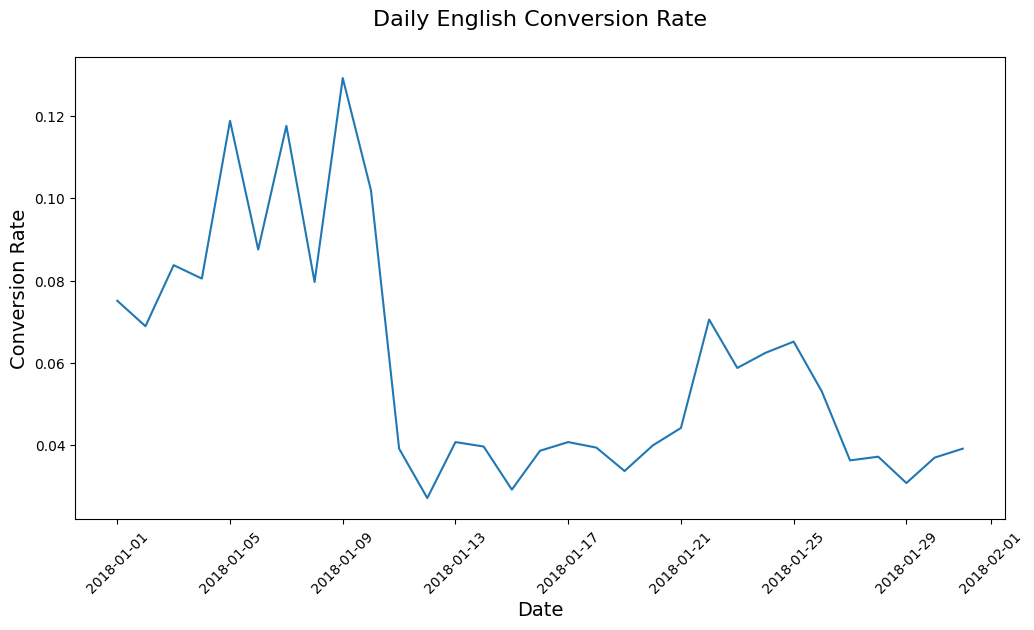

<Figure size 640x480 with 0 Axes>

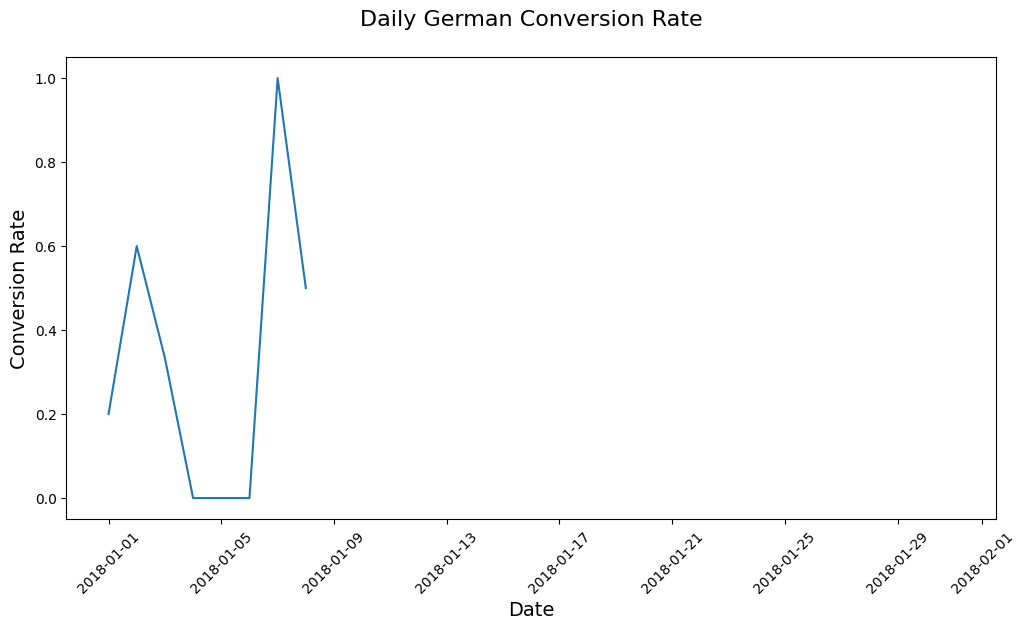

<Figure size 640x480 with 0 Axes>

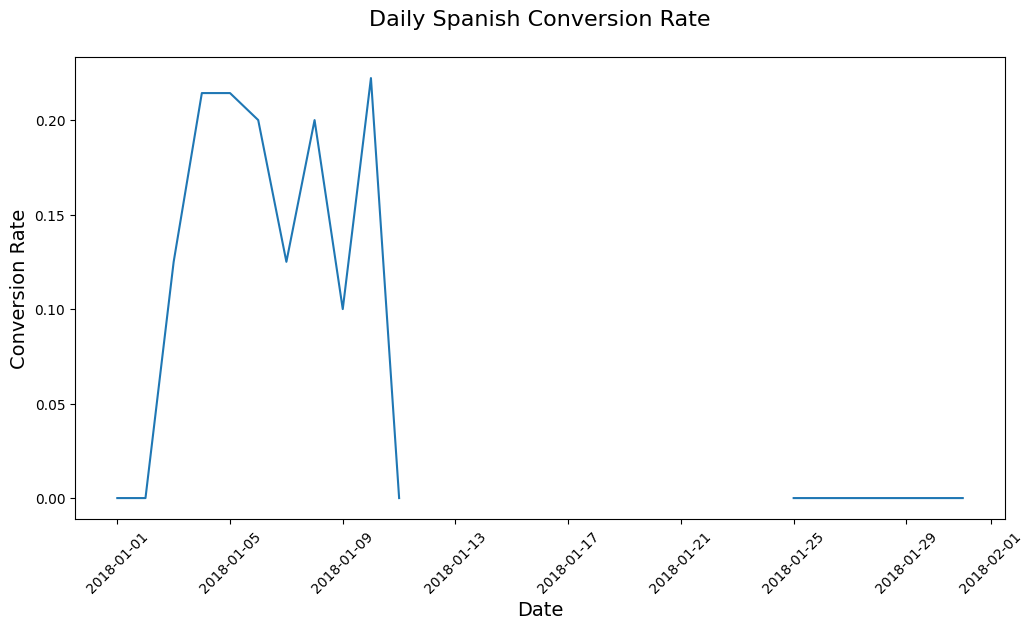

<Figure size 640x480 with 0 Axes>

In [23]:
# Use your plotting function to display results
plotting_conv(conv_lang_df)

As you can see, the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. You will investigate further.
    
Creating a DataFrame for house ads
    
The house ads team is concerned because they've seen their conversion rate drop suddenly in the past few weeks. In the previous exercises, you confirmed that conversion is down because you noticed a pattern around language preferences.

As a data scientist, it is your job to provide your marketing stakeholders with as specific feedback as possible as to what went wrong to maximize their ability to correct the problem. It is vital that you not only say "looks like there's a language problem," but instead identify what the problem is specifically so that the team doesn't repeat their mistake.

In [28]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

house_ads

C:\Users\Alienware\AppData\Local\Temp\ipykernel_29188\1322277773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW_served,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True,0.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True,0.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True,0.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True,0.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,a100007240,2018-01-26,House Ads,control,False,English,English,30-36 years,NaN,NaN,NaN,NaN,4.0,Yes
9985,a100007243,2018-01-29,House Ads,control,False,English,Spanish,55+ years,NaN,NaN,NaN,NaN,0.0,No
9988,a100007246,2018-01-01,House Ads,control,False,English,English,24-30 years,NaN,NaN,NaN,NaN,0.0,Yes
9991,a100007249,2018-01-04,House Ads,control,False,English,English,45-55 years,NaN,NaN,NaN,NaN,3.0,Yes


In [29]:
# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['user_id'].count()

language_check

date_served  is_correct_lang
2018-01-01   No                   2
             Yes                189
2018-01-02   No                   3
             Yes                247
2018-01-03   Yes                220
2018-01-04   Yes                168
2018-01-05   Yes                160
2018-01-06   No                   1
             Yes                151
2018-01-07   No                   2
             Yes                130
2018-01-08   Yes                154
2018-01-09   Yes                157
2018-01-10   Yes                170
2018-01-11   No                  20
             Yes                135
2018-01-12   No                  18
             Yes                130
2018-01-13   No                  26
             Yes                122
2018-01-14   No                  20
             Yes                131
2018-01-15   No                  16
             Yes                192
2018-01-16   No                  28
             Yes                127
2018-01-17   No                  21

In [30]:
# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)
language_check_df

is_correct_lang,No,Yes
date_served,,
2018-01-01,2.0,189.0
2018-01-02,3.0,247.0
2018-01-03,0.0,220.0
2018-01-04,0.0,168.0
2018-01-05,0.0,160.0
2018-01-06,1.0,151.0
2018-01-07,2.0,130.0
2018-01-08,0.0,154.0
2018-01-09,0.0,157.0


Confirming house ads error

Now that you've created a DataFrame that checks whether users see ads in the correct language let's calculate what percentage of users were not being served ads in the right language and plot your results.

In [31]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

language_check_df

is_correct_lang,No,Yes,pct
date_served,,,
2018-01-01,2.0,189.0,0.989529
2018-01-02,3.0,247.0,0.988000
2018-01-03,0.0,220.0,1.000000
2018-01-04,0.0,168.0,1.000000
2018-01-05,0.0,160.0,1.000000
2018-01-06,1.0,151.0,0.993421
2018-01-07,2.0,130.0,0.984848
2018-01-08,0.0,154.0,1.000000
2018-01-09,0.0,157.0,1.000000


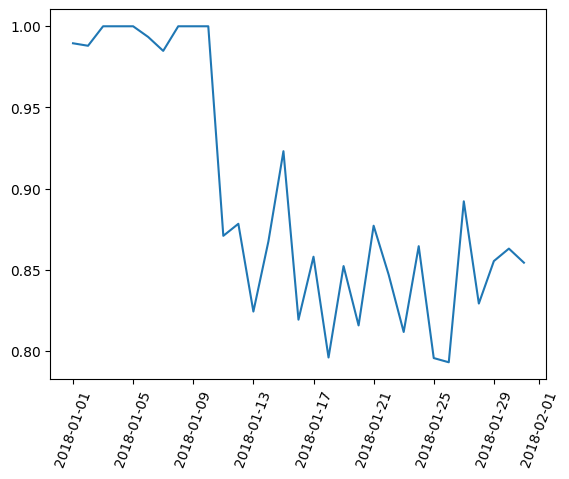

In [35]:
# Plot and show your results
plt.plot(language_check_df.index, language_check_df['pct'])
plt.xticks(rotation=70)
plt.show() #  house ads have been underperforming due to serving all ads in English rather than each user's preferred language

Setting up conversion indexes

Now that you've determined that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In this exercise, you will index non-English language conversion rates against English conversion rates in the time period before the language bug arose.

In [58]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, 'language_displayed')

lang_conv

language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64

In [59]:
# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


Analyzing user preferences

To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

In this step, you will create a new DataFrame that you can perform calculations on to determine the expected number of subscribers. This DataFrame will include how many users prefer each language by day. Once you have the DataFrame, you can begin calculating how many subscribers you would have expected to have had the language bug not occurred.

In [60]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served','language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

converted

user_id converted
date_served language_preferred                   
2018-01-01  Arabic                    2         2
            English                 171        13
            German                    5         1
            Spanish                  11         0
2018-01-02  Arabic                    3         0
...                                 ...       ...
2018-01-30  Spanish                  18         2
2018-01-31  Arabic                    7         1
            English                 130         4
            German                    4         0
            Spanish                  16         1

[119 rows x 2 columns]

In [61]:
# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

converted_df

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3  
2018-01-06               2  
2018-01-07               1  
2018-01-08               2  
2018-01-09               1  
2018-01-10               4  
2018-01-11               0  
2018-01-12               1  
2018-01-13               0  
2018-01-14               0  
2018-01-15               0  
2018-01-16               0  
2018-01-17               4  
2018-01-18               0  
2018-01-19               0  
2018-01-20               0  
2018-01-21               0  
2018-01-22               0  
2018-01-23               0  
2018-01-24               0  
2018-01-25               0  
2018-01-26               2  
2018-01-27               1  
2018-01-28               2  
2018-01-29               0  
2018-01-30               2  
2018-01-31               1

Creating a DataFrame based on indexes

Now that you've created an index to compare English conversion rates against all other languages, you will build out a DataFrame that will estimate what daily conversion rates should have been if users were being served the correct language.

An expected conversion DataFrame named converted has been created for you grouping house_ads by date and preferred language. It contains a count of unique users as well as the number of conversions for each language, each day.

For example, you can access the number of Spanish-speaking users who received house ads using converted[('user_id','Spanish')].

In [62]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]/  \
                                    converted_df.loc['2018-01-11':'2018-01-31'][('user_id','English')]

converted_df

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate  
language_preferred Spanish                    
date_served                                   
2018-01-01               0               NaN  
2018-01-02               0               NaN  
2018-01-03               1               NaN  
2018-01-04               3               NaN  
2018-01-05               3               NaN  
2018-01-06               2               NaN  
2018-01-07               1               NaN  
2018-01-08               2               NaN  
2018-01-09               1               NaN  
2018-01-10               4               NaN  
2018-01-11               0          0.045113  
2018-01-12               1          0.023256  
2018-01-13               0          0.041322  
2018-01-14               0          0.045802  
2018-01-15               0          0.031746  
2018-01-16               0          0.047244  
2018-01-17               4          0.015873  
2018-01-18               0          0.041322  
2018-01-19               0          0.031746  
2018-01-20               0          0.032258  
2018-01-21               0          0.050505  
2018-01-22               0          0.055556  
2018-01-23               0          0.072464  
2018-01-24               0          0.072289  
2018-01-25               0          0.053333  
2018-01-26               2          0.044944  
201

In [63]:
# Create expected conversios for each language 
converted_df['expected_spanish_conv_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_conv_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_conv_rate'] = converted_df['english_conv_rate']*german_index

converted_df


user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate expected_spanish_conv_rate  \
language_preferred Spanish                                                
date_served                                                               
2018-01-01               0               NaN                        NaN   
2018-01-02               0               NaN                        NaN   
2018-01-03               1               NaN                        NaN   
2018-01-04               3               NaN                        NaN   
2018-01-05               3               NaN                        NaN   
2018-01-06               2               NaN                        NaN   
2018-01-07               1               NaN                        NaN   
2018-01-08               2               NaN                        NaN   
2018-01-09               1               NaN                        NaN   
2018-01-10               4               NaN                        NaN   
2018-01-11               0          0.045113                   0.075876   
2018-01-12               1          0.023256                   0.039115   
2018-01-13               0          0.041322                   0.069501   
2018-01-14               0          0.045802                   0.077035   
2018-01-15               0          0.031746                   0.053394   
2018-01-16      

In [65]:
# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_converted'] = converted_df['expected_spanish_conv_rate']*converted_df[('user_id','Spanish')]
converted_df['expected_arabic_converted'] = converted_df['expected_arabic_conv_rate']*converted_df[('user_id','Arabic')]
converted_df['expected_german_converted'] = converted_df['expected_german_conv_rate']*converted_df[('user_id','German')]

converted_df


user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate expected_spanish_conv_rate  \
language_preferred Spanish                                                
date_served                                                               
2018-01-01               0               NaN                        NaN   
2018-01-02               0               NaN                        NaN   
2018-01-03               1               NaN                        NaN   
2018-01-04               3               NaN                        NaN   
2018-01-05               3               NaN                        NaN   
2018-01-06               2               NaN                        NaN   
2018-01-07               1               NaN                        NaN   
2018-01-08               2               NaN                        NaN   
2018-01-09               1               NaN                        NaN   
2018-01-10               4               NaN                        NaN   
2018-01-11               0          0.045113                   0.075876   
2018-01-12               1          0.023256                   0.039115   
2018-01-13               0          0.041322                   0.069501   
2018-01-14               0          0.045802                   0.077035   
2018-01-15               0          0.031746                   0.053394   
2018-01-16      

Assessing bug impact

It's time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language. Once the team has an estimate of the impact of this error, they can determine whether it's worth putting additional checks in place to avoid this in the future—you might be thinking, of course, it's worth it to try to prevent errors! In a way, you're right, but every choice a company makes requires work and funding. The more information your team has, the better they will be able to evaluate this trade-off.

The DataFrame converted has already been loaded for you. It contains expected subscribers columns for Spanish, Arabic and German language speakers named expected_spanish_conv, expected_arabic_conv and expected_german_conv respectively.

In [67]:
# Use .loc to slice only the relevant dates
converted_filt = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_filt['expected_spanish_converted'].sum() + converted_filt['expected_arabic_converted'].sum() + converted_filt['expected_german_converted'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_filt[('converted','Spanish')].sum() + converted_filt[('converted','Arabic')].sum() + converted_filt[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

24.457492473820594


Test allocation

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

Before you begin analyzing the results, you will check to ensure users were allocated equally to the test and control groups.

In [68]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel']=='Email']

email

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW_served
354,a100000526,2018-01-01,Email,personalization,True,Arabic,Arabic,0-18 years,1/1/18,NaN,Email,True,0.0
358,a100000530,2018-01-05,Email,personalization,True,Arabic,Arabic,19-24 years,1/5/18,NaN,Email,True,4.0
362,a100000534,2018-01-09,Email,personalization,False,English,English,45-55 years,1/9/18,NaN,Email,True,1.0
366,a100000538,2018-01-13,Email,personalization,True,Arabic,Arabic,24-30 years,1/13/18,1/23/18,Email,False,5.0
370,a100000542,2018-01-17,Email,personalization,True,English,English,0-18 years,1/17/18,2/12/18,Email,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,a100007288,2018-01-17,Email,control,True,German,German,30-36 years,1/17/18,4/26/18,Email,False,2.0
10031,a100007289,2018-01-17,Email,control,True,German,German,36-45 years,1/17/18,1/27/18,Email,False,2.0
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True,2.0


In [69]:
# Group the email DataFrame by variant 
alloc = email.groupby('variant')['user_id'].nunique()

alloc

variant
control            270
personalization    284
Name: user_id, dtype: int64

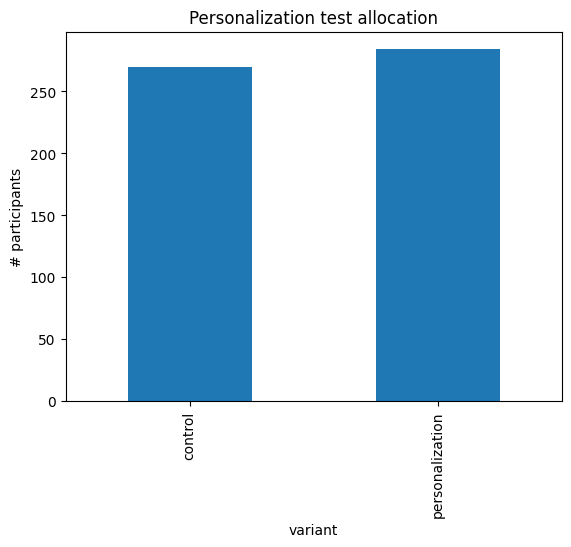

In [70]:
# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

Comparing conversion rates

Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

The DataFrame email has been loaded in your workspace which contains only rows from the marketing DataFrame where marketing_channel is 'Email'.

In [92]:
email.groupby(['user_id', 'variant']).size().sort_values(ascending = False)

user_id     variant        
a100000878  control            4
a100000889  control            2
a100000628  personalization    2
a100000889  personalization    2
a100000633  personalization    2
                              ..
a100002394  control            1
a100002393  control            1
a100002392  control            1
a100002391  control            1
a100007293  control            1
Length: 554, dtype: int64

In [71]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max() # checking if there's at least one conversion for each combination ['user_id', 'variant']
subscribers

user_id     variant        
a100000526  personalization     True
a100000530  personalization     True
a100000534  personalization    False
a100000538  personalization     True
a100000542  personalization     True
                               ...  
a100007288  control             True
a100007289  control             True
a100007290  control             True
a100007291  control             True
a100007293  control             True
Name: converted, Length: 554, dtype: object

In [93]:
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 
subscribers_df

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True
...,...,...
a100007288,True,NaN
a100007289,True,NaN
a100007290,True,NaN


In [94]:
# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', control.mean())
print('Personalization conversion rate:', personalization.mean())

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


Creating a lift function

Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:

(Treatment CR - Control CR) / Control CR

The result is the percent difference between the control and treatment.

In this exercise, you will create a function to automate the process of calculating lift. Many marketing teams run tests constantly. The more that you can automate the parts of the process that occur within every test, the more time you will have to do more interesting analyses.

In [96]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'

In [97]:
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


In [107]:
# statistical significance

stats.ttest_ind(control.astype(int), personalization.astype(int))

Ttest_indResult(statistic=-2.734329944750507, pvalue=0.006451487844694182)

Building an A/B test segmenting function

In the previous lesson, you observed that your personalization experiment is highly statistically significant. However, when running experiments, it is important to check how new features are affecting specific demographics. Sometimes features that are highly appealing to one group are less appealing to others.

Since you want to segment our data multiple times, you will build a function ab_segmentation() that analyzes the impact of your A/B tests on segments of data that you can reuse each time you want to conduct this kind of analysis.

Your function will take in a column name and run through each unique value in that column calculating lift and statistical significance.

In [108]:
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True,2.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True,4.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True,2.0


In [111]:
def ab_segmentation(segment):
    # Build a for loop for each subsegment in marketing
    for subsegment in np.unique(marketing[segment].values):
        print(subsegment)

        # Limit marketing to email and subsegment
        email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()

        print('lift:', lift(control, personalization)) 
        print('t-statistic:', stats.ttest_ind(control.astype(int), personalization.astype(int)), '\n\n')

Using your segmentation function

Now that you've generated an ab_segmentation() function, it's time to test it out.

Often a treatment will not affect all people uniformly. Some people will love a particular marketing campaign while others hate it. As a marketing data scientist, it's your responsibility to enable your marketing stakeholders to target users according to their preferences.

We will run through two segments in our data that may be relevant to assessing the impact of our test.

In [112]:
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.19100834180787182, pvalue=0.8494394170062677) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




C:\Users\Alienware\AppData\Local\Temp\ipykernel_29188\2067684287.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print('t-statistic:', stats.ttest_ind(control.astype(int), personalization.astype(int)), '\n\n')


In [113]:
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142212, pvalue=0.003872449439129706) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.0317943847866697, pvalue=0.00306238361146892) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867335) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.185906464414798, pvalue=0.0023238487431765337) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.431790127931851, pvalue=0.017975686009788258) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.0654991273179326, pvalue=0.04306233968820123) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.326565456420339, pvalue=0.0016358623456360468) 




In [ ]:
# You found that personalization was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.